In [2]:
# NEW TASK WITH CUSTOMER DATA
#Step 1
# load the data
import pandas as pd
df=pd.read_excel("/content/knn_customers.xlsx")
print(df.head())


         Age  AnnualIncome  SpendingScore  Segment
0  26.986857  31610.043122      27.244579        0
1  24.446943  32523.530369      35.205000        0
2  27.590754  34873.730594      40.041950        0
3  31.092119  34742.109234      40.375845        0
4  24.063387  23800.487844      36.399476        0


In [3]:
#Step 2
# Define the features
# we seperate our input features (x1,x2) from the output label.
#split into features(x) and labels (y)
X=df[["Age","AnnualIncome","SpendingScore"]] # features
y=df["Segment"] #target/labels

In [4]:
# Step 3
# we use 80% data to train the model and 20% to test it. This helps check how3 well the model works on unseen data.
#split  into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)#42-random shuffle is repeatable

In [5]:
# Step 4 - Scale the features
# knn works by measuring distances between points
#use standard scaler to scale all features equally.
#if one feature is larger than another, it dominates the distance . so we scale them to same range.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [6]:
# Step 5
# create  and train the knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #we use five nearest points
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [7]:
# Step 6
# Test the model (make predictions)
# we now ask the model top predict the class for test data
y_pred=knn.predict(X_test_scaled)

In [8]:
# Step 7
# CHECK ACCURACY
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",round(acc,2))

Accuracy: 1.0


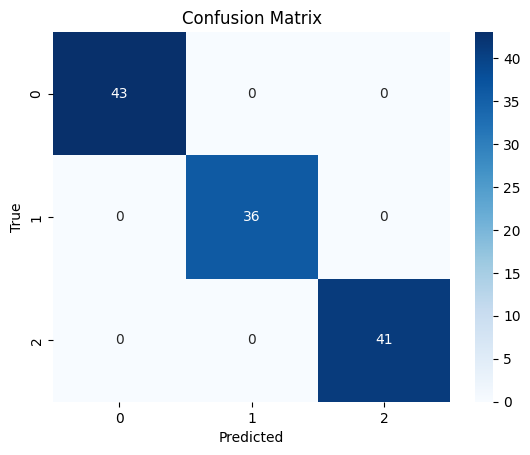

In [9]:
# Step 8
# see Confusion matrix
# this hsows exactly how many were correctly or incorrectly classified
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
#print("Confusion Matrix:")
#print(cm)
# 28 data belongs to 0 group
# 32 belongs to 1 grp and 40 data belongs to 2 group class

In [ ]:
# Step 9
# visualize decision boundaries
import numpy as np
x_min,x_max=X["Age"].min()-1,X["Age"].max()+1
y_min,y_max=X["AnnualIncome"].min()-1,X["AnnualIncome"].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))         # We create a mesh grid = a fine grid of points covering the whole area.
Z=knn.predict(scaler.transform(np.c_[xx.ravel(),yy.ravel()]))           # ravel() flattens the 2D arrays xx and yy into 1D lists.
                                                                                  # np.c[] combines them column_wise
Z=Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx,yy,Z,alpha=0.3,cmap="viridis")
plt.scatter(X["Age"],X["AnnualIncome"],c=y,cmap="viridis",edgecolor="k")
plt.title("KNN Decision Boundaries (K=5)")
plt.xlabel("Age")
plt.ylabel("AnnualIncome")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
k_values=[1,3,5,7,9,11,13]
scores=[]
for k in k_values:
  model=KNeighborsClassifier(n_neighbors)